In [157]:
import pandas as pd
penguins = pd.read_csv('penguins.csv')
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [158]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [159]:
penguins = penguins.fillna(penguins.groupby('Species').transform('mean')) 

In [160]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   344 non-null    float64
 1   CulmenDepth    344 non-null    float64
 2   FlipperLength  344 non-null    float64
 3   BodyMass       344 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [161]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X, y = penguins[features], penguins[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.100000,18.700000,181.000000,3750.000000
1,39.500000,17.400000,186.000000,3800.000000
2,40.300000,18.000000,195.000000,3250.000000
3,38.791391,18.346358,189.953642,3700.662252
4,36.700000,19.300000,193.000000,3450.000000
...,...,...,...,...
339,55.800000,19.800000,207.000000,4000.000000
340,43.500000,18.100000,202.000000,3400.000000
341,49.600000,18.200000,193.000000,3775.000000
342,50.800000,19.000000,210.000000,4100.000000



y:


0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: Species, Length: 344, dtype: int64

In [162]:
X.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
count,344.000000,344.000000,344.000000,344.000000
mean,43.917431,17.148339,200.930641,4202.839182
std,5.454118,1.973561,14.060613,801.461347
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.575000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.250000,4756.250000
max,59.600000,21.500000,231.000000,6300.000000


Unique values: 166


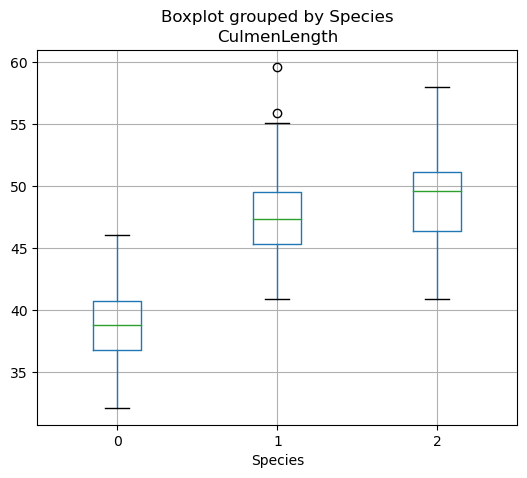

Unique values: 82


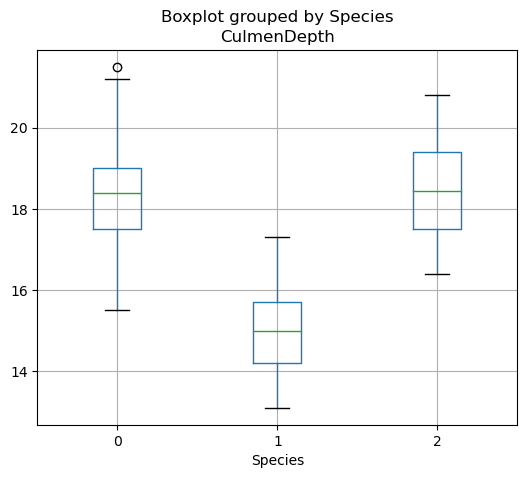

Unique values: 57


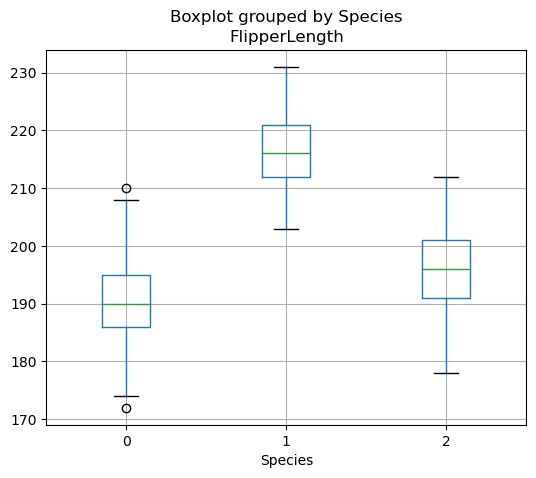

Unique values: 96


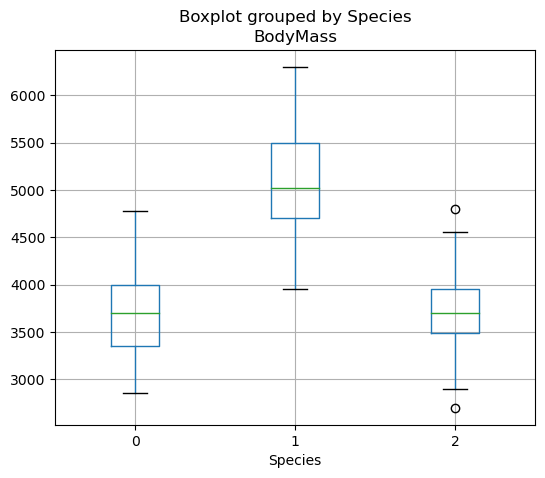

In [163]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(penguins[col].unique())}')
    penguins.boxplot(column=col, by='Species', figsize=(6,5))
    plt.title(col)
    plt.show()

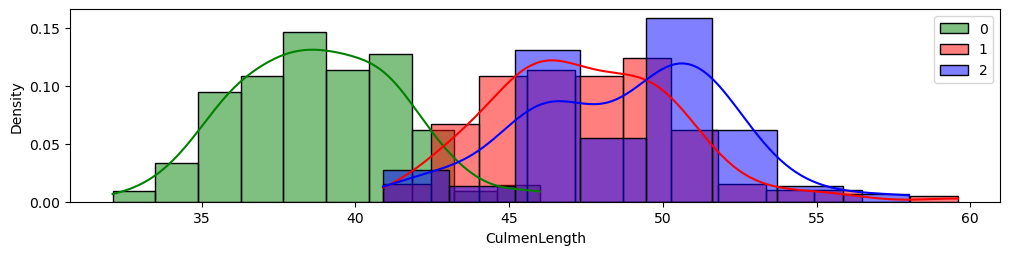

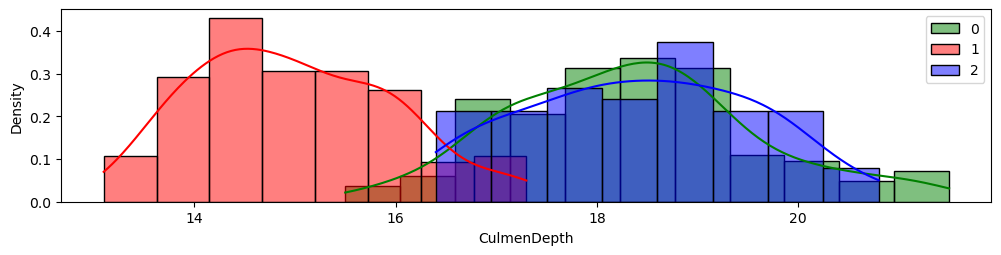

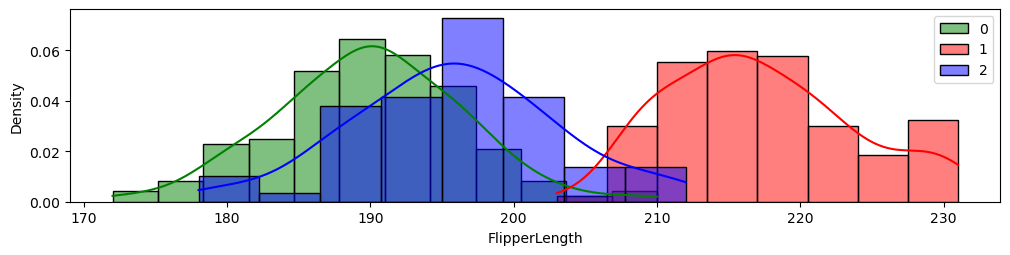

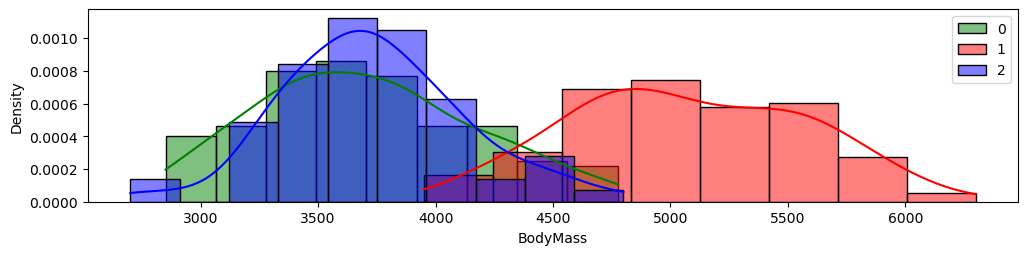

In [164]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.histplot(penguins.loc[penguins['Species']==0, col], kde=True, stat="density", color='green', label='0')
    sns.histplot(penguins.loc[penguins['Species']==1, col], kde=True, stat="density", color='red', label='1')
    sns.histplot(penguins.loc[penguins['Species']==2, col], kde=True, stat="density", color='blue', label='2')
    plt.legend(loc='upper right')
    plt.show()

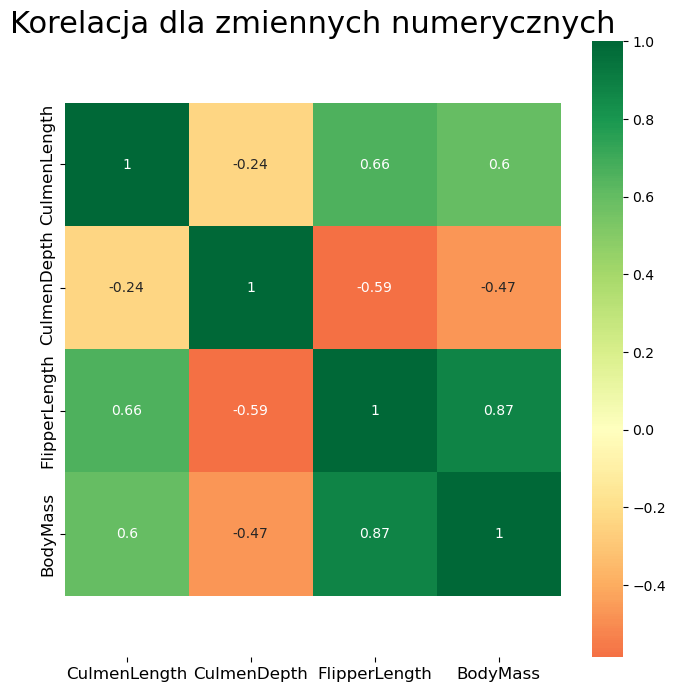

In [165]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [166]:
# ponieważ zmienna objaśniana jest zmienną kategorczną wykorzystamy współczynnik korelacji punktowo-dwuseryjnej (Point-biserial correlation coefficient).
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

CulmenLength     0.780457
FlipperLength    0.359224
BodyMass         0.211727
CulmenDepth     -0.185156
dtype: float64

In [167]:
# W zasadzie można by spróbować zbadać tylko dwie pierwsze cechy, zwłaszcza biorąc pod uwagę korelację FlipperLength z BodyMass i CulumenDepth.


In [168]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba, pos_label=3)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions, pos_label=3)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

Wykorzystam transformację binarną One vs Rest. W związku z tym tworzę 3 klasyfikatory:


    Classifier 0: [0] v/s [1, 2]

    Classifier 1: [1] v/s [0, 2]

    Classifier 2: [2] v/s [0, 1]

                  Species


In [169]:
# tworzę klasy łączone dla klasyfikatorów, dla rozróżnienia nazywam je "3"

y0 = y.copy()
y1 = y.copy()
y2 = y.copy()

y0[y0 != 0] = 3
y1[y1 != 1] = 3
y2[y2 != 2] = 3

In [170]:
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [171]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

Classifier 0

In [172]:
X_train, X_test, y0_train, y0_test = train_test_split(X, y0, test_size=0.30, random_state=0, stratify=y0)

In [173]:
random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y0_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model0 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 10, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        46
           3       0.94      1.00      0.97        58

    accuracy                           0.96       104
   macro avg       0.97      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



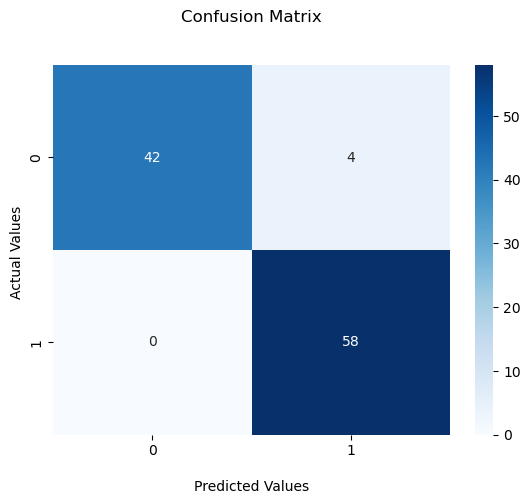

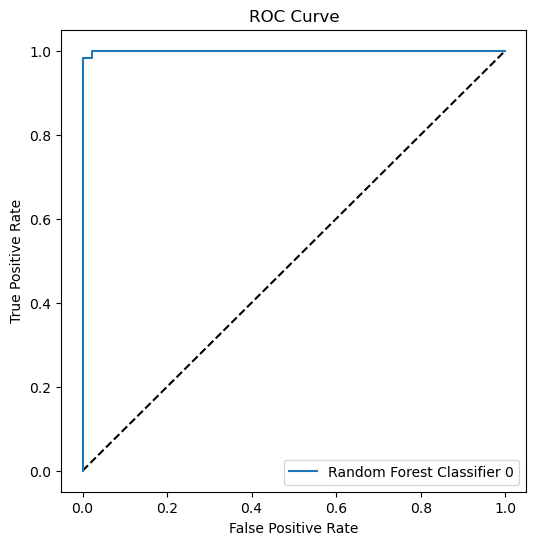

C:\Users\jrosl\AppData\Local\Temp\ipykernel_17092\437928156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random Forest Classifier 0,0.966667,0.999625


In [174]:
calculate_metrics(rf_model0, 'Random Forest Classifier 0', X_test, y0_test)

In [175]:
svm = SVC(probability=True)
params_svm = {'C': [0.1, 0.5, 1, 10, 100],
             'kernel': ['rbf', 'linear', 'pol', 'sigmoid']}
svm_gridsearch = GridSearchCV(svm,
                             params_svm,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
svm_gridsearch.fit(X_train_standardized, y0_train)
print('\nBest hyperparameter:', svm_gridsearch.best_params_)
svm_model0 = svm_gridsearch.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best hyperparameter: {'C': 10, 'kernel': 'sigmoid'}


c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\lib\site-packages\skle

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        46
           3       0.61      0.57      0.59        58

    accuracy                           0.56       104
   macro avg       0.56      0.56      0.56       104
weighted avg       0.56      0.56      0.56       104



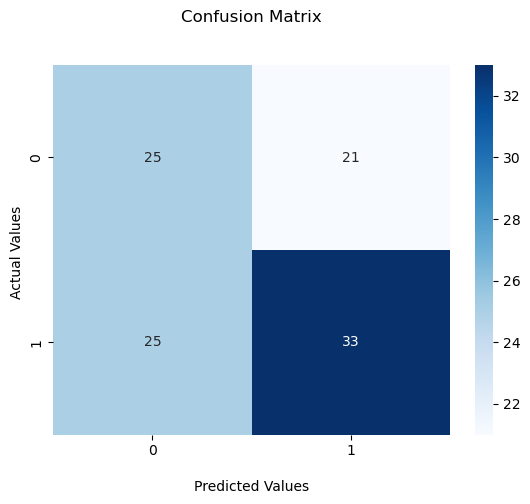

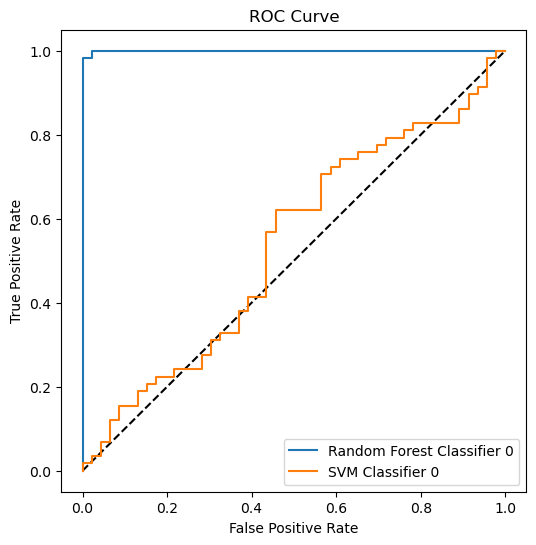

C:\Users\jrosl\AppData\Local\Temp\ipykernel_17092\437928156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random Forest Classifier 0,0.966667,0.999625
1,SVM Classifier 0,0.589286,0.535607


In [176]:
calculate_metrics(svm_model0, 'SVM Classifier 0', X_test_standardized, y0_test)

In [177]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
params_ab = {'n_estimators': [25, 50, 100, 200]}
ab_gridsearch = GridSearchCV(adaboost,
                             params_ab,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
ab_gridsearch.fit(X_train, y0_train)
print('\nBest hyperparameter:', ab_gridsearch.best_params_)
ab_model0 = ab_gridsearch.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best hyperparameter: {'n_estimators': 25}


c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           3       0.95      0.98      0.97        58

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



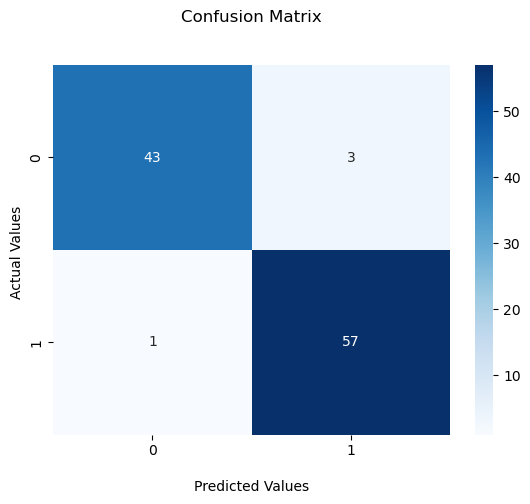

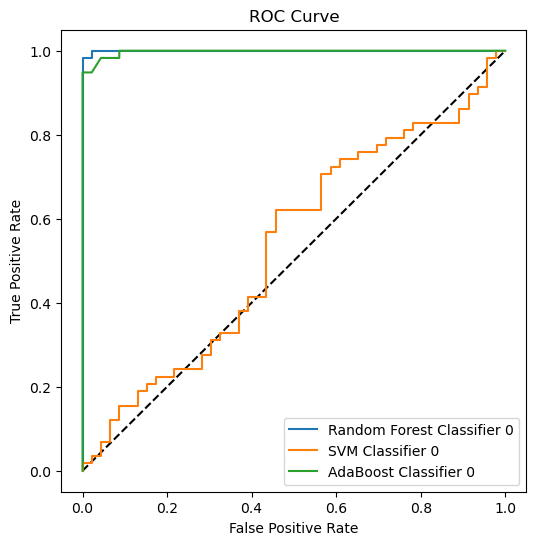

C:\Users\jrosl\AppData\Local\Temp\ipykernel_17092\437928156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random Forest Classifier 0,0.966667,0.999625
1,SVM Classifier 0,0.589286,0.535607
2,AdaBoost Classifier 0,0.966102,0.997376


In [178]:
calculate_metrics(ab_model0, 'AdaBoost Classifier 0', X_test, y0_test)

Classifier 1

In [179]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.30, random_state=0, stratify=y1)

In [180]:
random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y1_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model1 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        67

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



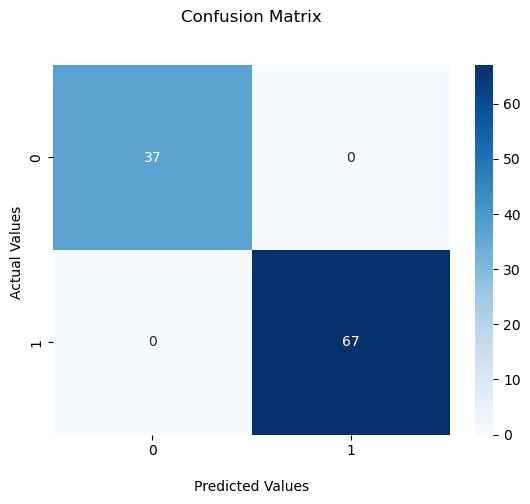

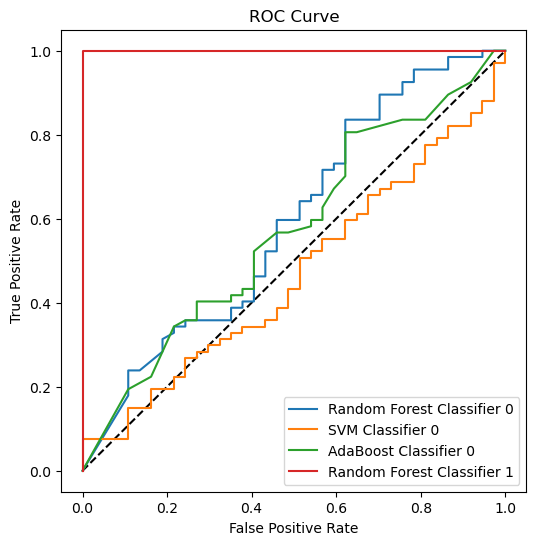

C:\Users\jrosl\AppData\Local\Temp\ipykernel_17092\437928156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random Forest Classifier 0,0.966667,0.999625
1,SVM Classifier 0,0.589286,0.535607
2,AdaBoost Classifier 0,0.966102,0.997376
3,Random Forest Classifier 1,1.000000,1.000000


In [181]:
calculate_metrics(rf_model1, 'Random Forest Classifier 1', X_test, y1_test)

In [182]:
svm = SVC(probability=True)
params_svm = {'C': [0.1, 0.5, 1, 10, 100],
             'kernel': ['rbf', 'linear', 'pol', 'sigmoid']}
svm_gridsearch = GridSearchCV(svm,
                             params_svm,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
svm_gridsearch.fit(X_train_standardized, y1_train)
print('\nBest hyperparameter:', svm_gridsearch.best_params_)
svm_model1 = svm_gridsearch.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best hyperparameter: {'C': 10, 'kernel': 'sigmoid'}


c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\lib\site-packages\sklea

              precision    recall  f1-score   support

           1       0.36      0.32      0.34        37
           3       0.65      0.69      0.67        67

    accuracy                           0.56       104
   macro avg       0.51      0.51      0.50       104
weighted avg       0.55      0.56      0.55       104



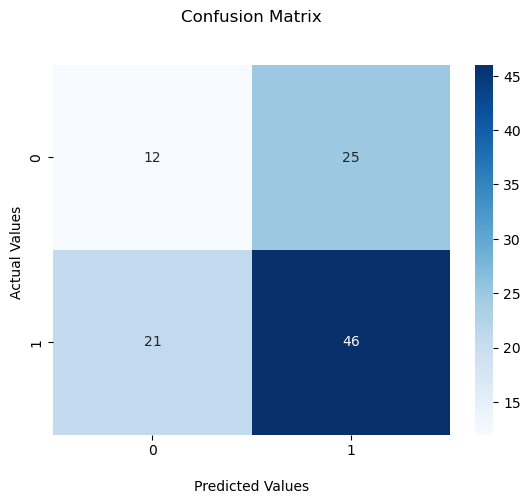

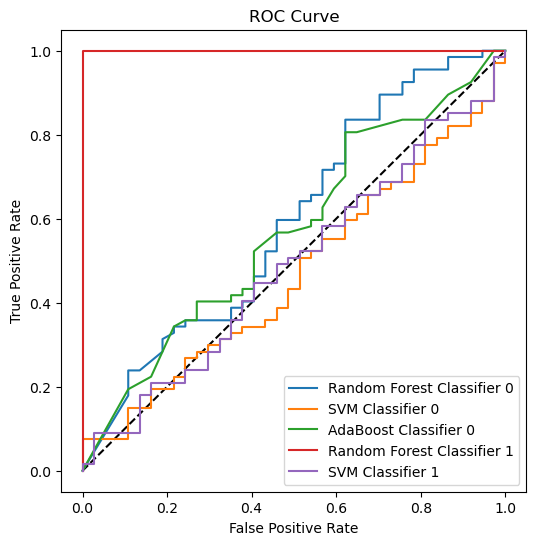

C:\Users\jrosl\AppData\Local\Temp\ipykernel_17092\437928156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random Forest Classifier 0,0.966667,0.999625
1,SVM Classifier 0,0.589286,0.535607
2,AdaBoost Classifier 0,0.966102,0.997376
3,Random Forest Classifier 1,1.000000,1.000000
4,SVM Classifier 1,0.666667,0.488100


In [183]:
calculate_metrics(svm_model1, 'SVM Classifier 1', X_test_standardized, y1_test)

In [184]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
params_ab = {'n_estimators': [25, 50, 100, 200]}
ab_gridsearch = GridSearchCV(adaboost,
                             params_ab,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
ab_gridsearch.fit(X_train, y1_train)
print('\nBest hyperparameter:', ab_gridsearch.best_params_)
ab_model1 = ab_gridsearch.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best hyperparameter: {'n_estimators': 25}


c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        67

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



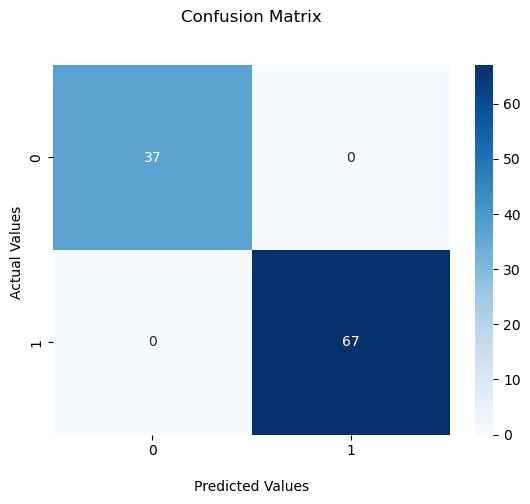

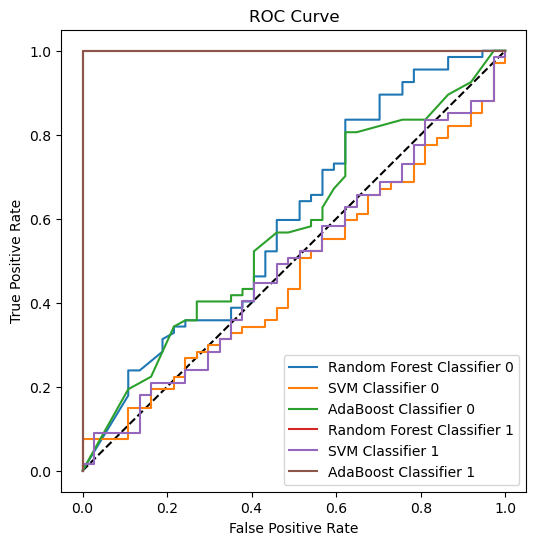

C:\Users\jrosl\AppData\Local\Temp\ipykernel_17092\437928156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random Forest Classifier 0,0.966667,0.999625
1,SVM Classifier 0,0.589286,0.535607
2,AdaBoost Classifier 0,0.966102,0.997376
3,Random Forest Classifier 1,1.000000,1.000000
4,SVM Classifier 1,0.666667,0.488100
5,AdaBoost Classifier 1,1.000000,1.000000


In [185]:
calculate_metrics(ab_model1, 'AdaBoost Classifier 1', X_test, y1_test)

Classifier 2

In [186]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.30, random_state=0, stratify=y2)

In [187]:
random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y2_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           2       0.95      0.90      0.93        21
           3       0.98      0.99      0.98        83

    accuracy                           0.97       104
   macro avg       0.96      0.95      0.95       104
weighted avg       0.97      0.97      0.97       104



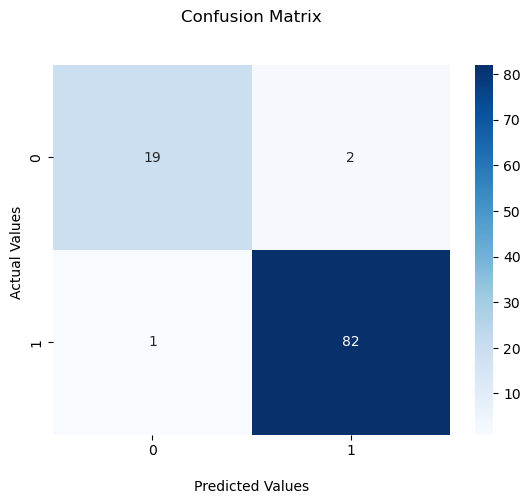

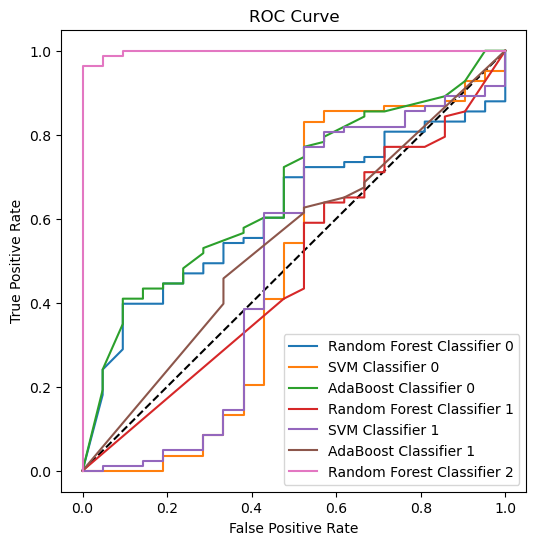

C:\Users\jrosl\AppData\Local\Temp\ipykernel_17092\437928156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random Forest Classifier 0,0.966667,0.999625
1,SVM Classifier 0,0.589286,0.535607
2,AdaBoost Classifier 0,0.966102,0.997376
3,Random Forest Classifier 1,1.000000,1.000000
4,SVM Classifier 1,0.666667,0.488100
5,AdaBoost Classifier 1,1.000000,1.000000
6,Random Forest Classifier 2,0.982036,0.997705


In [188]:
calculate_metrics(rf_model2, 'Random Forest Classifier 2', X_test, y2_test)

In [189]:
svm = SVC(probability=True)
params_svm = {'C': [0.1, 0.5, 1, 10, 100],
             'kernel': ['rbf', 'linear', 'pol', 'sigmoid']}
svm_gridsearch = GridSearchCV(svm,
                             params_svm,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
svm_gridsearch.fit(X_train_standardized, y2_train)
print('\nBest hyperparameter:', svm_gridsearch.best_params_)
svm_model2 = svm_gridsearch.best_estimator_

c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\lib\site-packages\sklea

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best hyperparameter: {'C': 10, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        83

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



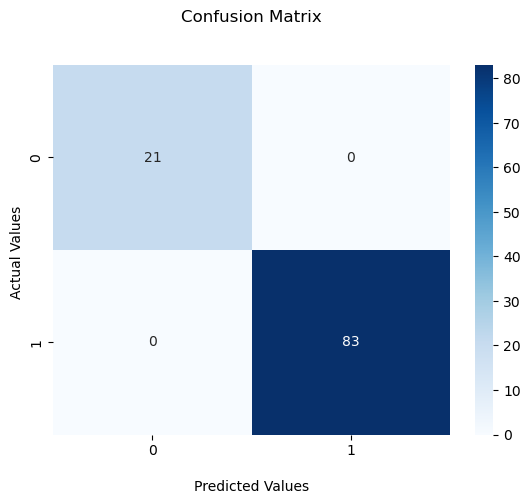

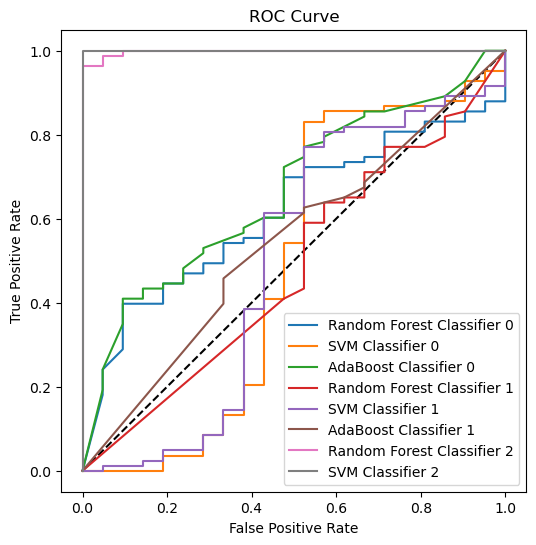

C:\Users\jrosl\AppData\Local\Temp\ipykernel_17092\437928156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random Forest Classifier 0,0.966667,0.999625
1,SVM Classifier 0,0.589286,0.535607
2,AdaBoost Classifier 0,0.966102,0.997376
3,Random Forest Classifier 1,1.000000,1.000000
4,SVM Classifier 1,0.666667,0.488100
5,AdaBoost Classifier 1,1.000000,1.000000
6,Random Forest Classifier 2,0.982036,0.997705
7,SVM Classifier 2,1.000000,1.000000


In [190]:
calculate_metrics(svm_model2, 'SVM Classifier 2', X_test_standardized, y2_test)

In [191]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
params_ab = {'n_estimators': [25, 50, 100, 200]}
ab_gridsearch = GridSearchCV(adaboost,
                             params_ab,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
ab_gridsearch.fit(X_train, y2_train)
print('\nBest hyperparameter:', ab_gridsearch.best_params_)
ab_model2 = ab_gridsearch.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best hyperparameter: {'n_estimators': 25}


c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           2       0.95      0.90      0.93        21
           3       0.98      0.99      0.98        83

    accuracy                           0.97       104
   macro avg       0.96      0.95      0.95       104
weighted avg       0.97      0.97      0.97       104



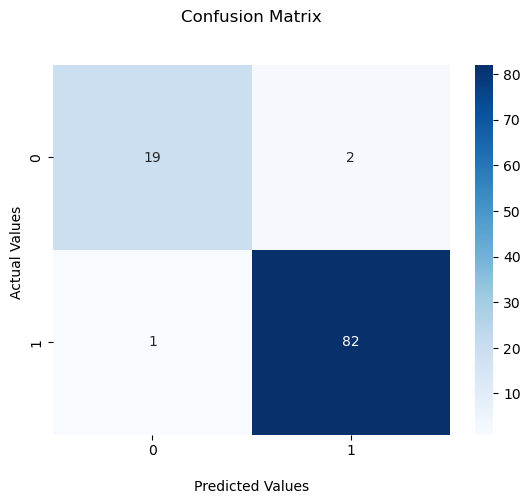

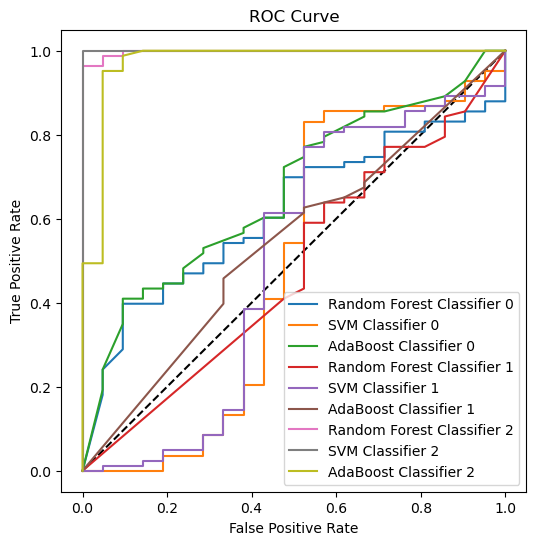

C:\Users\jrosl\AppData\Local\Temp\ipykernel_17092\437928156.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Random Forest Classifier 0,0.966667,0.999625
1,SVM Classifier 0,0.589286,0.535607
2,AdaBoost Classifier 0,0.966102,0.997376
3,Random Forest Classifier 1,1.000000,1.000000
4,SVM Classifier 1,0.666667,0.488100
5,AdaBoost Classifier 1,1.000000,1.000000
6,Random Forest Classifier 2,0.982036,0.997705
7,SVM Classifier 2,1.000000,1.000000
8,AdaBoost Classifier 2,0.982036,0.973322


In [192]:
calculate_metrics(ab_model2, 'AdaBoost Classifier 2', X_test, y2_test)